# 🔍 Validation des Données - Eye of Emergency

**Objectif** : Vérifier la qualité, la cohérence et le pouvoir prédictif des données preprocessées

**Date** : 28 juillet 2025  
**Version** : 1.0  
**Statut** : Validation post-preprocessing

---

## 📋 Plan de Validation

1. **🔄 Chargement et Inspection Générale**
2. **📊 Validation de la Qualité des Données**
3. **🎯 Validation de la Cohérence des Labels**
4. **⚙️ Validation des Features Extraites**
5. **🧠 Analyse du Pouvoir Prédictif**
6. **📈 Tests Statistiques de Significativité**
7. **✅ Rapport de Validation Final**

In [113]:
# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import json
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("📚 Bibliothèques importées avec succès")
print("🎨 Style des graphiques configuré")
print("ℹ️  Utilisation de pandas, numpy, scipy et matplotlib pour l'analyse")

📚 Bibliothèques importées avec succès
🎨 Style des graphiques configuré
ℹ️  Utilisation de pandas, numpy, scipy et matplotlib pour l'analyse


## 1. 🔄 Chargement et Inspection Générale

In [114]:
# Chargement du dataset optimisé V3 (train uniquement)
print("📁 Chargement du dataset train optimisé V3...")

# Chargement de la version optimisée V3
try:
    train_df = pd.read_csv('../data/processed/train_optimized_v3.csv')
    print(f"✅ Dataset train V3 chargé avec succès")
except FileNotFoundError:
    print(f"❌ Erreur: Fichier train_optimized_v3.csv non trouvé")
    print(f"   Veuillez d'abord exécuter le preprocessing V3")
    raise

print(f"✅ Train V3: {len(train_df):,} tweets, {len(train_df.columns)} colonnes")

# Inspection des premières lignes
print(f"\n🔍 Aperçu des données d'entraînement V3:")
display(train_df.head())

print(f"\n📊 Structure des colonnes V3:")
for i, col in enumerate(train_df.columns, 1):
    print(f"{i:2}. {col} ({train_df[col].dtype})")

📁 Chargement du dataset train optimisé V3...
✅ Dataset train V3 chargé avec succès
✅ Train V3: 6,249 tweets, 20 colonnes

🔍 Aperçu des données d'entraînement V3:


,id,keyword,target,text_cleaned,text_length,word_count,char_count,has_emergency_word,emergency_word_count,emergency_density,has_url,url_count,has_mention,mention_count,exclamation_count,intense_punctuation,avg_word_length,urgency_score,stopword_ratio,keyword_in_text
0,10293,weapon,0,mention_token changing my weapon!,33,4,33,False,0,0.000000,False,0,True,1,1,0,7.500000,1.5,0.250000,True
1,5096,famine,1,url_token russian food crematoria provoke outr...,115,11,87,True,1,0.090909,True,2,False,0,0,0,7.000000,0.5,0.000000,True
2,4041,disaster,0,the mention_token quote website disaster. trie...,143,22,153,True,1,0.045455,False,0,True,1,0,0,6.000000,0.0,0.181818,True
3,1637,bombing,1,mention_token mention_token mention_token cong...,140,19,151,True,1,0.052632,False,0,True,3,0,0,7.000000,0.0,0.263158,True
4,7614,pandemonium,0,world class tgirl ass small_num - scene small_...,71,11,73,False,0,0.000000,True,1,False,0,0,0,5.727273,0.0,0.000000,True



📊 Structure des colonnes V3:
 1. id (int64)
 2. keyword (object)
 3. target (int64)
 4. text_cleaned (object)
 5. text_length (int64)
 6. word_count (int64)
 7. char_count (int64)
 8. has_emergency_word (bool)
 9. emergency_word_count (int64)
10. emergency_density (float64)
11. has_url (bool)
12. url_count (int64)
13. has_mention (bool)
14. mention_count (int64)
15. exclamation_count (int64)
16. intense_punctuation (int64)
17. avg_word_length (float64)
18. urgency_score (float64)
19. stopword_ratio (float64)
20. keyword_in_text (bool)


In [115]:
# Statistiques descriptives générales
print("📈 STATISTIQUES DESCRIPTIVES GÉNÉRALES")
print("=" * 50)

print(f"📊 Dataset Train V3:")
print(f"   Nombre de tweets: {len(train_df):,}")
print(f"   Nombre de colonnes: {len(train_df.columns)}")
print(f"   Mémoire utilisée: {train_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Distribution des classes
print(f"\n🎯 Distribution des classes:")
class_dist = train_df['target'].value_counts()
class_pct = train_df['target'].value_counts(normalize=True) * 100
for cls in [0, 1]:
    label = "Non-catastrophe" if cls == 0 else "Catastrophe"
    print(f"   Classe {cls} ({label}): {class_dist[cls]:,} tweets ({class_pct[cls]:.1f}%)")

ratio = class_dist[0] / class_dist[1]
print(f"   Ratio d'équilibrage: {ratio:.2f}")

# Identification des types de colonnes
feature_cols = [col for col in train_df.columns if col not in ['id', 'keyword', 'target', 'text_cleaned']]
print(f"\n⚙️  Features extraites: {len(feature_cols)}")
print(f"📄 Colonnes métadonnées: {len(train_df.columns) - len(feature_cols)}")

📈 STATISTIQUES DESCRIPTIVES GÉNÉRALES
📊 Dataset Train V3:
   Nombre de tweets: 6,249
   Nombre de colonnes: 20
   Mémoire utilisée: 1.94 MB

🎯 Distribution des classes:
   Classe 0 (Non-catastrophe): 3,671 tweets (58.7%)
   Classe 1 (Catastrophe): 2,578 tweets (41.3%)
   Ratio d'équilibrage: 1.42

⚙️  Features extraites: 16
📄 Colonnes métadonnées: 4


## 2. 📊 Validation de la Qualité des Données

In [116]:
def validate_data_quality(df, dataset_name):
    """Valide la qualité d'un dataset"""
    print(f"\n🔍 VALIDATION QUALITÉ - {dataset_name}")
    print("=" * 40)
    
    # 1. Valeurs manquantes
    missing = df.isnull().sum()
    print("📋 Valeurs manquantes:")
    if missing.sum() == 0:
        print("   ✅ Aucune valeur manquante")
    else:
        for col, count in missing[missing > 0].items():
            pct = (count / len(df)) * 100
            print(f"   ⚠️  {col}: {count} ({pct:.1f}%)")
    
    # 2. Doublons
    duplicates = df.duplicated().sum()
    print(f"\n📋 Doublons complets: {duplicates}")
    if duplicates == 0:
        print("   ✅ Aucun doublon")
    else:
        print(f"   ⚠️  {duplicates} doublons trouvés")
    
    # 3. Doublons de texte
    if 'text_cleaned' in df.columns:
        text_dupes = df['text_cleaned'].duplicated().sum()
        print(f"\n📋 Doublons de texte: {text_dupes}")
        if text_dupes == 0:
            print("   ✅ Aucun doublon de texte")
        else:
            print(f"   ⚠️  {text_dupes} doublons de texte")
    
    # 4. Textes vides
    if 'text_cleaned' in df.columns:
        empty_texts = (df['text_cleaned'] == '').sum() + df['text_cleaned'].isnull().sum()
        print(f"\n📋 Textes vides: {empty_texts}")
        if empty_texts == 0:
            print("   ✅ Aucun texte vide")
        else:
            print(f"   ⚠️  {empty_texts} textes vides")
    
    # 5. Cohérence des types de données
    print("\n📋 Types de données:")
    type_issues = []
    
    # Vérification des colonnes numériques
    numeric_cols = ['text_length', 'word_count', 'char_count', 'url_count', 'mention_count', 
                   'exclamation_count', 'question_count', 'caps_ratio', 'emergency_word_count']
    for col in numeric_cols:
        if col in df.columns:
            if not pd.api.types.is_numeric_dtype(df[col]):
                type_issues.append(f"{col} devrait être numérique")
    
    # Vérification des colonnes booléennes
    bool_cols = ['has_url', 'has_mention', 'has_emergency_word', 'keyword_in_text']
    for col in bool_cols:
        if col in df.columns:
            unique_vals = df[col].unique()
            if not all(val in [True, False, 0, 1] for val in unique_vals if pd.notna(val)):
                type_issues.append(f"{col} devrait être booléen")
    
    if type_issues:
        for issue in type_issues:
            print(f"   ⚠️  {issue}")
    else:
        print("   ✅ Tous les types sont cohérents")
    
    return {
        'missing_values': missing.sum(),
        'duplicates': duplicates,
        'text_duplicates': text_dupes if 'text_cleaned' in df.columns else 0,
        'empty_texts': empty_texts if 'text_cleaned' in df.columns else 0,
        'type_issues': len(type_issues)
    }

# Validation du dataset train V3
train_quality = validate_data_quality(train_df, "TRAIN V3")


🔍 VALIDATION QUALITÉ - TRAIN V3
📋 Valeurs manquantes:
   ⚠️  keyword: 49 (0.8%)

📋 Doublons complets: 0
   ✅ Aucun doublon

📋 Doublons de texte: 0
   ✅ Aucun doublon de texte

📋 Textes vides: 0
   ✅ Aucun texte vide

📋 Types de données:
   ✅ Tous les types sont cohérents
📋 Valeurs manquantes:
   ⚠️  keyword: 49 (0.8%)

📋 Doublons complets: 0
   ✅ Aucun doublon

📋 Doublons de texte: 0
   ✅ Aucun doublon de texte

📋 Textes vides: 0
   ✅ Aucun texte vide

📋 Types de données:
   ✅ Tous les types sont cohérents


In [117]:
# Validation des plages de valeurs des features
print("\n📊 VALIDATION DES PLAGES DE VALEURS")
print("=" * 40)

def validate_feature_ranges(df, dataset_name):
    """Valide les plages de valeurs des features"""
    print(f"\n🎯 {dataset_name}:")
    
    issues = []
    
    # 1. Longueurs de texte
    if 'text_length' in df.columns:
        min_len, max_len = df['text_length'].min(), df['text_length'].max()
        print(f"   Longueur texte: {min_len} - {max_len} caractères")
        if min_len < 0 or max_len > 1000:  # Limites raisonnables pour Twitter
            issues.append("Longueurs de texte suspectes")
    
    # 2. Nombre de mots
    if 'word_count' in df.columns:
        min_words, max_words = df['word_count'].min(), df['word_count'].max()
        print(f"   Nombre de mots: {min_words} - {max_words} mots")
        if min_words < 0 or max_words > 200:
            issues.append("Nombre de mots suspect")
    
    # 3. Ratio de majuscules
    if 'caps_ratio' in df.columns:
        min_caps, max_caps = df['caps_ratio'].min(), df['caps_ratio'].max()
        print(f"   Ratio majuscules: {min_caps:.3f} - {max_caps:.3f}")
        if min_caps < 0 or max_caps > 1:
            issues.append("Ratio de majuscules invalide")
    
    # 4. Compteurs (doivent être >= 0)
    count_cols = ['url_count', 'mention_count', 'exclamation_count', 'question_count', 'emergency_word_count']
    for col in count_cols:
        if col in df.columns:
            min_val = df[col].min()
            if min_val < 0:
                issues.append(f"{col} a des valeurs négatives")
    
    # 5. Cohérence entre features booléennes et compteurs
    coherence_checks = [
        ('has_url', 'url_count'),
        ('has_mention', 'mention_count'),
        ('has_emergency_word', 'emergency_word_count')
    ]
    
    for bool_col, count_col in coherence_checks:
        if bool_col in df.columns and count_col in df.columns:
            # Si has_X est True, alors X_count doit être > 0
            incoherent = ((df[bool_col] == True) & (df[count_col] == 0)).sum()
            if incoherent > 0:
                issues.append(f"Incohérence {bool_col}/{count_col}: {incoherent} cas")
            
            # Si X_count > 0, alors has_X doit être True
            incoherent2 = ((df[count_col] > 0) & (df[bool_col] == False)).sum()
            if incoherent2 > 0:
                issues.append(f"Incohérence {count_col}/{bool_col}: {incoherent2} cas")
    
    if issues:
        for issue in issues:
            print(f"   ⚠️  {issue}")
    else:
        print("   ✅ Toutes les plages sont valides")
    
    return len(issues)

train_range_issues = validate_feature_ranges(train_df, "TRAIN V3")


📊 VALIDATION DES PLAGES DE VALEURS

🎯 TRAIN V3:
   Longueur texte: 7 - 157 caractères
   Nombre de mots: 1 - 35 mots
   ⚠️  Incohérence has_emergency_word/emergency_word_count: 1027 cas


## 3. 🎯 Validation de la Cohérence des Labels

In [118]:
# Validation de la cohérence des labels (train seulement)
print("🎯 VALIDATION DE LA COHÉRENCE DES LABELS")
print("=" * 45)

def validate_labels(df):
    """Valide la cohérence des labels"""
    if 'target' not in df.columns:
        print("⚠️  Pas de colonne target (dataset de test)")
        return {}
    
    # 1. Valeurs de target
    unique_targets = sorted(df['target'].unique())
    print(f"📊 Valeurs de target: {unique_targets}")
    
    issues = []
    if not all(val in [0, 1] for val in unique_targets):
        issues.append("Valeurs de target invalides (doivent être 0 ou 1)")
    
    # 2. Distribution des classes
    class_counts = df['target'].value_counts().sort_index()
    print(f"\n📊 Distribution des classes:")
    for cls, count in class_counts.items():
        pct = (count / len(df)) * 100
        label = "Non-catastrophe" if cls == 0 else "Catastrophe"
        print(f"   Classe {cls} ({label}): {count:,} tweets ({pct:.1f}%)")
    
    # 3. Équilibrage des classes
    minority_class = class_counts.min()
    majority_class = class_counts.max()
    imbalance_ratio = majority_class / minority_class
    print(f"\n⚖️ Ratio de déséquilibre: {imbalance_ratio:.2f}")
    
    if imbalance_ratio > 3:
        issues.append(f"Classes très déséquilibrées (ratio {imbalance_ratio:.2f})")
    elif imbalance_ratio > 2:
        print("   ⚠️  Classes modérément déséquilibrées")
    else:
        print("   ✅ Classes relativement équilibrées")
    
    # 4. Vérification des conflits de labels (même texte, labels différents)
    if 'text_cleaned' in df.columns:
        text_label_groups = df.groupby('text_cleaned')['target'].nunique()
        conflicts = (text_label_groups > 1).sum()
        print(f"\n🔍 Conflits de labels: {conflicts}")
        
        if conflicts > 0:
            issues.append(f"{conflicts} textes avec labels conflictuels")
            # Afficher quelques exemples
            conflict_texts = text_label_groups[text_label_groups > 1].index[:3]
            print("   Exemples de conflits:")
            for text in conflict_texts:
                labels = df[df['text_cleaned'] == text]['target'].unique()
                print(f"   '{text[:50]}...' → targets: {labels}")
        else:
            print("   ✅ Aucun conflit de label")
    
    if issues:
        print("\n⚠️  Problèmes détectés:")
        for issue in issues:
            print(f"   - {issue}")
    else:
        print("\n✅ Labels cohérents")
    
    return {
        'unique_values': unique_targets,
        'class_distribution': class_counts.to_dict(),
        'imbalance_ratio': imbalance_ratio,
        'label_conflicts': conflicts if 'text_cleaned' in df.columns else 0,
        'issues': len(issues)
    }

label_validation = validate_labels(train_df)

🎯 VALIDATION DE LA COHÉRENCE DES LABELS
📊 Valeurs de target: [0, 1]

📊 Distribution des classes:
   Classe 0 (Non-catastrophe): 3,671 tweets (58.7%)
   Classe 1 (Catastrophe): 2,578 tweets (41.3%)

⚖️ Ratio de déséquilibre: 1.42
   ✅ Classes relativement équilibrées

🔍 Conflits de labels: 0
   ✅ Aucun conflit de label

✅ Labels cohérents


## 4. ⚙️ Validation des Features Extraites

In [119]:
# Validation des features extraites
print("⚙️ VALIDATION DES FEATURES EXTRAITES")
print("=" * 40)

def validate_features(df, dataset_name):
    """Valide les features extraites"""
    print(f"\n🔍 {dataset_name}:")
    
    # Identifier les features
    base_cols = ['id', 'keyword', 'target', 'text_cleaned']
    feature_cols = [col for col in df.columns if col not in base_cols]
    
    print(f"📊 {len(feature_cols)} features extraites:")
    for i, col in enumerate(feature_cols, 1):
        print(f"   {i:2}. {col}")
    
    # Statistiques descriptives des features numériques
    numeric_features = df[feature_cols].select_dtypes(include=[np.number]).columns
    print(f"\n📈 Statistiques des features numériques ({len(numeric_features)}):")
    
    desc_stats = df[numeric_features].describe()
    display(desc_stats.round(3))
    
    # Détection des features constantes
    constant_features = []
    for col in feature_cols:
        if df[col].nunique() <= 1:
            constant_features.append(col)
    
    print(f"\n🚨 Features constantes: {len(constant_features)}")
    if constant_features:
        for feat in constant_features:
            unique_val = df[feat].unique()[0]
            print(f"   ⚠️  {feat}: toujours {unique_val}")
    else:
        print("   ✅ Aucune feature constante")
    
    # Détection des features quasi-constantes (>95% même valeur)
    quasi_constant = []
    for col in feature_cols:
        if col not in constant_features:
            value_counts = df[col].value_counts(normalize=True)
            max_freq = value_counts.iloc[0]
            if max_freq > 0.95:
                quasi_constant.append((col, max_freq, value_counts.index[0]))
    
    print(f"\n⚠️  Features quasi-constantes (>95%): {len(quasi_constant)}")
    if quasi_constant:
        for feat, freq, val in quasi_constant:
            print(f"   {feat}: {freq:.1%} = {val}")
    else:
        print("   ✅ Aucune feature quasi-constante")
    
    return {
        'total_features': len(feature_cols),
        'numeric_features': len(numeric_features),
        'constant_features': len(constant_features),
        'quasi_constant_features': len(quasi_constant),
        'feature_names': feature_cols
    }

train_features = validate_features(train_df, "TRAIN V3")

⚙️ VALIDATION DES FEATURES EXTRAITES

🔍 TRAIN V3:
📊 16 features extraites:
    1. text_length
    2. word_count
    3. char_count
    4. has_emergency_word
    5. emergency_word_count
    6. emergency_density
    7. has_url
    8. url_count
    9. has_mention
   10. mention_count
   11. exclamation_count
   12. intense_punctuation
   13. avg_word_length
   14. urgency_score
   15. stopword_ratio
   16. keyword_in_text

📈 Statistiques des features numériques (12):


,text_length,word_count,char_count,emergency_word_count,emergency_density,url_count,mention_count,exclamation_count,intense_punctuation,avg_word_length,urgency_score,stopword_ratio
count,6249.000,6249.000,6249.000,6249.000,6249.000,6249.000,6249.000,6249.000,6249.000,6249.000,6249.000,6249.000
mean,100.042,15.955,102.489,0.454,0.031,0.580,0.373,0.157,0.110,5.644,1.574,0.251
std,34.370,6.319,40.638,0.709,0.054,0.651,0.725,0.617,0.393,1.373,2.511,0.146
min,7.000,1.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,2.250,0.000,0.000
25%,75.000,11.000,72.000,0.000,0.000,0.000,0.000,0.000,0.000,4.667,0.000,0.143
50%,106.000,16.000,105.000,0.000,0.000,0.000,0.000,0.000,0.000,5.500,1.000,0.250
75%,133.000,21.000,132.000,1.000,0.053,1.000,1.000,0.000,0.000,6.385,2.000,0.357
max,157.000,35.000,304.000,7.000,0.500,4.000,8.000,12.000,9.000,16.800,60.000,0.750



🚨 Features constantes: 0
   ✅ Aucune feature constante

⚠️  Features quasi-constantes (>95%): 0
   ✅ Aucune feature quasi-constante


## 5. 🧠 Analyse du Pouvoir Prédictif

### 📊 Matrice de Corrélation et Analyse des Relations

📊 MATRICE DE CORRÉLATION ET ANALYSE DES RELATIONS
📈 Matrice de corrélation calculée pour 16 features + target


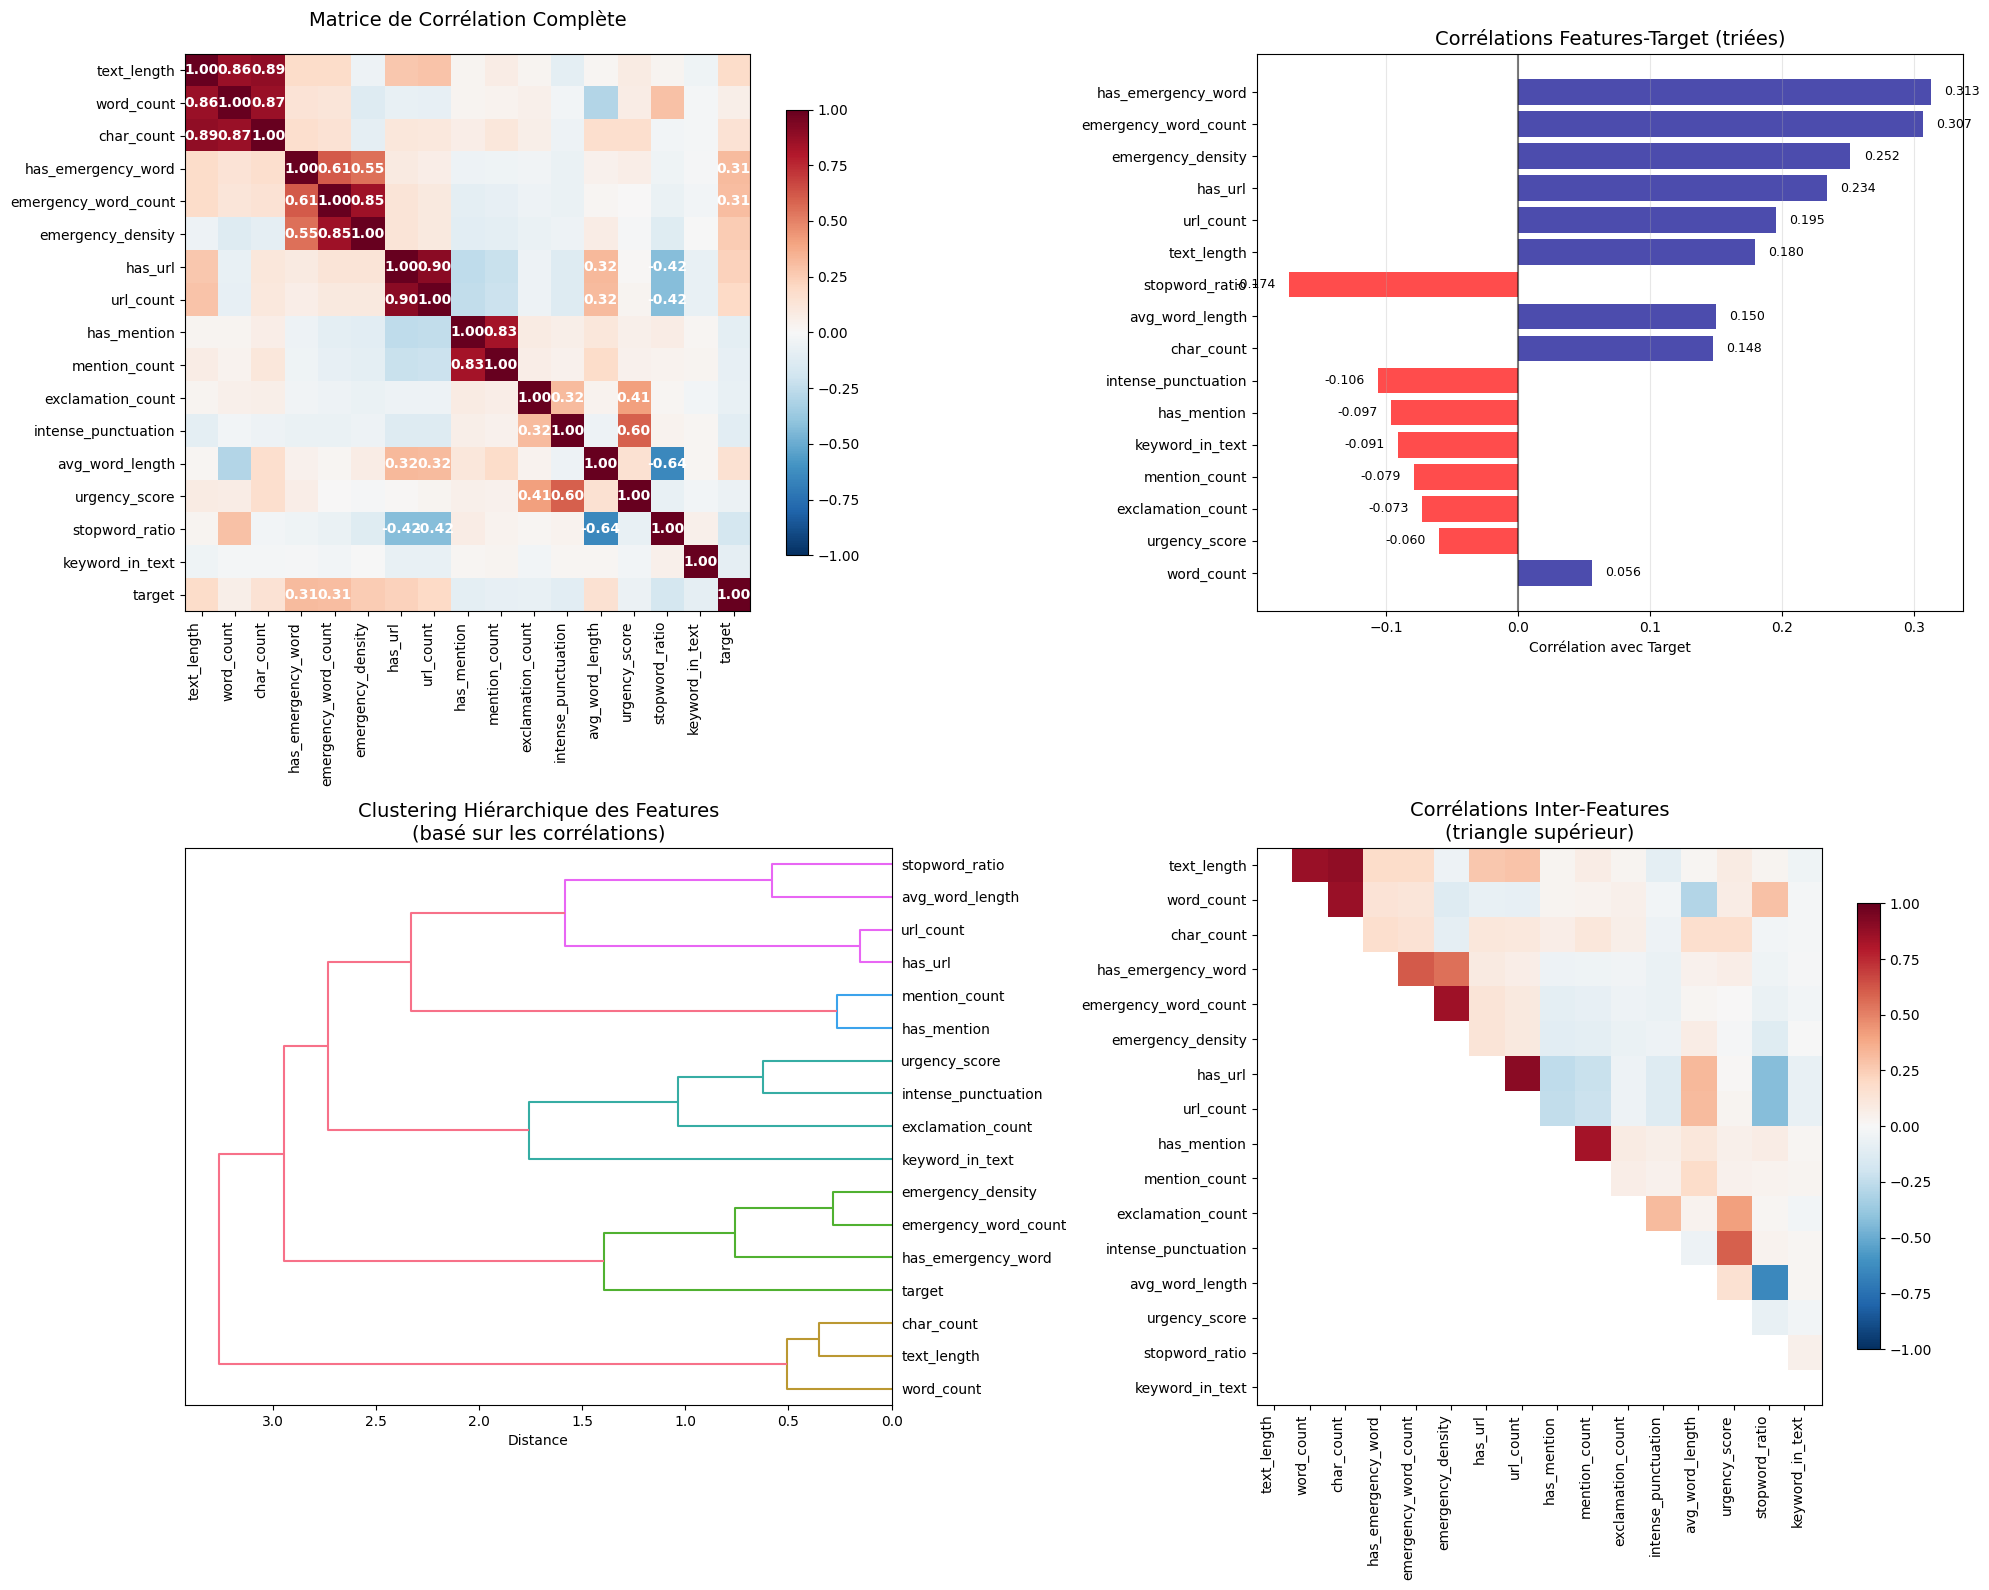


📈 ANALYSE STATISTIQUE DES CORRÉLATIONS:
---------------------------------------------
🎯 Corrélations avec TARGET:
   Moyenne: 0.157
   Médiane: 0.149
   Max: 0.313
   Min: 0.056

📊 Répartition des corrélations avec TARGET:
   Fortes (>0.2): 4 features
   Moyennes (0.1-0.2): 6 features
   Faibles (<0.1): 6 features

🔗 Corrélations INTER-FEATURES:
   Moyenne: 0.155
   Max: 0.904
   Min: 0.001
   Corrélations élevées (>0.7): 12
   Corrélations moyennes (0.5-0.7): 8
   ⚠️  Attention: 12 paires de features fortement corrélées (multicolinéarité)

🏆 TOP 5 FEATURES LES PLUS CORRÉLÉES avec TARGET:
   1. has_emergency_word       : +0.313 (positive)
   2. emergency_word_count     : +0.307 (positive)
   3. emergency_density        : +0.252 (positive)
   4. has_url                  : +0.234 (positive)
   5. url_count                : +0.195 (positive)

🔍 ANALYSE DE REDONDANCE DES FEATURES:
⚠️  6 paires de features potentiellement redondantes (>0.8):
   • has_url ↔ url_count: 0.904
   • text_length

In [125]:
# Analyse de la matrice de corrélation complète
print("📊 MATRICE DE CORRÉLATION ET ANALYSE DES RELATIONS")
print("=" * 55)

# Préparation des données pour la matrice de corrélation
feature_cols = [col for col in train_df.columns if col not in ['id', 'keyword', 'target', 'text_cleaned']]
correlation_data = train_df[feature_cols + ['target']].copy()

# Calcul de la matrice de corrélation
correlation_matrix = correlation_data.corr()

print(f"📈 Matrice de corrélation calculée pour {len(feature_cols)} features + target")

# Création de visualisations avancées
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Heatmap complète de la matrice de corrélation
ax1 = axes[0, 0]
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Masquer la partie supérieure
im1 = ax1.imshow(correlation_matrix.values, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
ax1.set_xticks(range(len(correlation_matrix.columns)))
ax1.set_yticks(range(len(correlation_matrix.columns)))
ax1.set_xticklabels(correlation_matrix.columns, rotation=90, ha='right')
ax1.set_yticklabels(correlation_matrix.columns)
ax1.set_title('Matrice de Corrélation Complète', fontsize=14, pad=20)

# Ajouter les valeurs dans les cellules pour les corrélations importantes
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.3:  # Afficher seulement les corrélations fortes
            text = ax1.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                          ha="center", va="center", color="white", fontweight='bold')

plt.colorbar(im1, ax=ax1, shrink=0.8)

# 2. Heatmap focalisée sur les corrélations avec le target
ax2 = axes[0, 1]
target_correlations = correlation_matrix['target'].drop('target')
target_correlations_abs = target_correlations.abs().sort_values(ascending=True)

colors = ['red' if x < 0 else 'darkblue' for x in target_correlations[target_correlations_abs.index]]
bars = ax2.barh(range(len(target_correlations_abs)), 
                target_correlations[target_correlations_abs.index], 
                color=colors, alpha=0.7)

ax2.set_yticks(range(len(target_correlations_abs)))
ax2.set_yticklabels(target_correlations_abs.index, fontsize=10)
ax2.set_xlabel('Corrélation avec Target')
ax2.set_title('Corrélations Features-Target (triées)', fontsize=14)
ax2.grid(axis='x', alpha=0.3)
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.5)

# Ajouter les valeurs sur les barres
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width + (0.01 if width >= 0 else -0.01), bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left' if width >= 0 else 'right', va='center', fontsize=9)

# 3. Clustering hiérarchique des features
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

ax3 = axes[1, 0]

# Calculer la distance basée sur les corrélations
distance_matrix = 1 - correlation_matrix.abs()
condensed_distances = pdist(distance_matrix.values)
linkage_matrix = linkage(condensed_distances, method='ward')

# Créer le dendrogramme
dendrogram(linkage_matrix, labels=correlation_matrix.index, 
           orientation='left', ax=ax3, leaf_font_size=10)
ax3.set_title('Clustering Hiérarchique des Features\n(basé sur les corrélations)', fontsize=14)
ax3.set_xlabel('Distance')

# 4. Analyse des corrélations inter-features (hors target)
ax4 = axes[1, 1]

# Extraire les corrélations entre features (hors target)
feature_corr_matrix = correlation_matrix.drop('target', axis=0).drop('target', axis=1)

# Trouver les paires de features les plus corrélées
upper_triangle = np.triu(feature_corr_matrix.values, k=1)
upper_triangle[upper_triangle == 0] = np.nan

# Créer un heatmap des corrélations inter-features
im4 = ax4.imshow(upper_triangle, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
ax4.set_xticks(range(len(feature_corr_matrix.columns)))
ax4.set_yticks(range(len(feature_corr_matrix.columns)))
ax4.set_xticklabels(feature_corr_matrix.columns, rotation=90, ha='right')
ax4.set_yticklabels(feature_corr_matrix.columns)
ax4.set_title('Corrélations Inter-Features\n(triangle supérieur)', fontsize=14)

plt.colorbar(im4, ax=ax4, shrink=0.8)

plt.tight_layout()
plt.show()

# Analyse statistique des corrélations
print(f"\n📈 ANALYSE STATISTIQUE DES CORRÉLATIONS:")
print("-" * 45)

# Corrélations avec le target
target_corr_stats = target_correlations.abs().describe()
print(f"🎯 Corrélations avec TARGET:")
print(f"   Moyenne: {target_corr_stats['mean']:.3f}")
print(f"   Médiane: {target_corr_stats['50%']:.3f}")
print(f"   Max: {target_corr_stats['max']:.3f}")
print(f"   Min: {target_corr_stats['min']:.3f}")

strong_corr_target = (target_correlations.abs() > 0.2).sum()
medium_corr_target = ((target_correlations.abs() > 0.1) & (target_correlations.abs() <= 0.2)).sum()
weak_corr_target = (target_correlations.abs() <= 0.1).sum()

print(f"\n📊 Répartition des corrélations avec TARGET:")
print(f"   Fortes (>0.2): {strong_corr_target} features")
print(f"   Moyennes (0.1-0.2): {medium_corr_target} features")
print(f"   Faibles (<0.1): {weak_corr_target} features")

# Corrélations inter-features
feature_correlations = feature_corr_matrix.values
feature_correlations = feature_correlations[~np.isnan(feature_correlations)]
feature_correlations = feature_correlations[feature_correlations != 1.0]  # Exclure l'auto-corrélation

if len(feature_correlations) > 0:
    print(f"\n🔗 Corrélations INTER-FEATURES:")
    print(f"   Moyenne: {np.mean(np.abs(feature_correlations)):.3f}")
    print(f"   Max: {np.max(np.abs(feature_correlations)):.3f}")
    print(f"   Min: {np.min(np.abs(feature_correlations)):.3f}")
    
    high_inter_corr = (np.abs(feature_correlations) > 0.7).sum()
    medium_inter_corr = ((np.abs(feature_correlations) > 0.5) & (np.abs(feature_correlations) <= 0.7)).sum()
    
    print(f"   Corrélations élevées (>0.7): {high_inter_corr}")
    print(f"   Corrélations moyennes (0.5-0.7): {medium_inter_corr}")
    
    if high_inter_corr > 0:
        print(f"   ⚠️  Attention: {high_inter_corr} paires de features fortement corrélées (multicolinéarité)")

# Top corrélations avec target
print(f"\n🏆 TOP 5 FEATURES LES PLUS CORRÉLÉES avec TARGET:")
top_5_target = target_correlations.abs().nlargest(5)
for i, (feature, corr) in enumerate(top_5_target.items(), 1):
    direction = "positive" if target_correlations[feature] > 0 else "négative"
    print(f"   {i}. {feature:25}: {target_correlations[feature]:+.3f} ({direction})")

# Identification des features potentiellement redondantes
print(f"\n🔍 ANALYSE DE REDONDANCE DES FEATURES:")
redundant_pairs = []
for i in range(len(feature_corr_matrix.columns)):
    for j in range(i+1, len(feature_corr_matrix.columns)):
        corr_val = abs(feature_corr_matrix.iloc[i, j])
        if corr_val > 0.8:  # Seuil de redondance
            feature1 = feature_corr_matrix.columns[i]
            feature2 = feature_corr_matrix.columns[j]
            redundant_pairs.append((feature1, feature2, corr_val))

if redundant_pairs:
    print(f"⚠️  {len(redundant_pairs)} paires de features potentiellement redondantes (>0.8):")
    for feat1, feat2, corr in sorted(redundant_pairs, key=lambda x: x[2], reverse=True):
        print(f"   • {feat1} ↔ {feat2}: {corr:.3f}")
else:
    print("✅ Aucune redondance significative détectée entre features")

print(f"\n💡 RECOMMANDATIONS BASÉES SUR LA MATRICE DE CORRÉLATION:")
print("-" * 55)

recommendations_corr = []

if strong_corr_target < len(feature_cols) * 0.3:
    recommendations_corr.append("🎯 Enrichir le feature engineering pour augmenter le nombre de features fortement corrélées")

if len(redundant_pairs) > 0:
    recommendations_corr.append(f"🗑️  Considérer la suppression d'une feature dans chaque paire redondante ({len(redundant_pairs)} paires)")

if weak_corr_target > len(feature_cols) * 0.5:
    recommendations_corr.append("🔍 Revoir les features faiblement corrélées pour optimisation")

if np.mean(np.abs(target_correlations)) < 0.1:
    recommendations_corr.append("⚡ Améliorer le feature engineering global (corrélation moyenne trop faible)")

if not recommendations_corr:
    recommendations_corr.append("✅ Matrice de corrélation optimale pour la modélisation ML")

for rec in recommendations_corr:
    print(f"   {rec}")

🧠 ANALYSE DU POUVOIR PRÉDICTIF
📊 Analysant 16 features...

📈 Top 10 features par corrélation avec target:


,feature,correlation,abs_correlation
3,has_emergency_word,0.313069,0.313069
4,emergency_word_count,0.307108,0.307108
5,emergency_density,0.251918,0.251918
6,has_url,0.233809,0.233809
7,url_count,0.195330,0.195330
0,text_length,0.179757,0.179757
14,stopword_ratio,-0.173923,0.173923
12,avg_word_length,0.149807,0.149807
2,char_count,0.147929,0.147929
11,intense_punctuation,-0.106202,0.106202


🧠 ANALYSE DU POUVOIR PRÉDICTIF
📊 Analysant 16 features...

📈 Top 10 features par corrélation avec target:


,feature,correlation,abs_correlation
3,has_emergency_word,0.313069,0.313069
4,emergency_word_count,0.307108,0.307108
5,emergency_density,0.251918,0.251918
6,has_url,0.233809,0.233809
7,url_count,0.195330,0.195330
0,text_length,0.179757,0.179757
14,stopword_ratio,-0.173923,0.173923
12,avg_word_length,0.149807,0.149807
2,char_count,0.147929,0.147929
11,intense_punctuation,-0.106202,0.106202


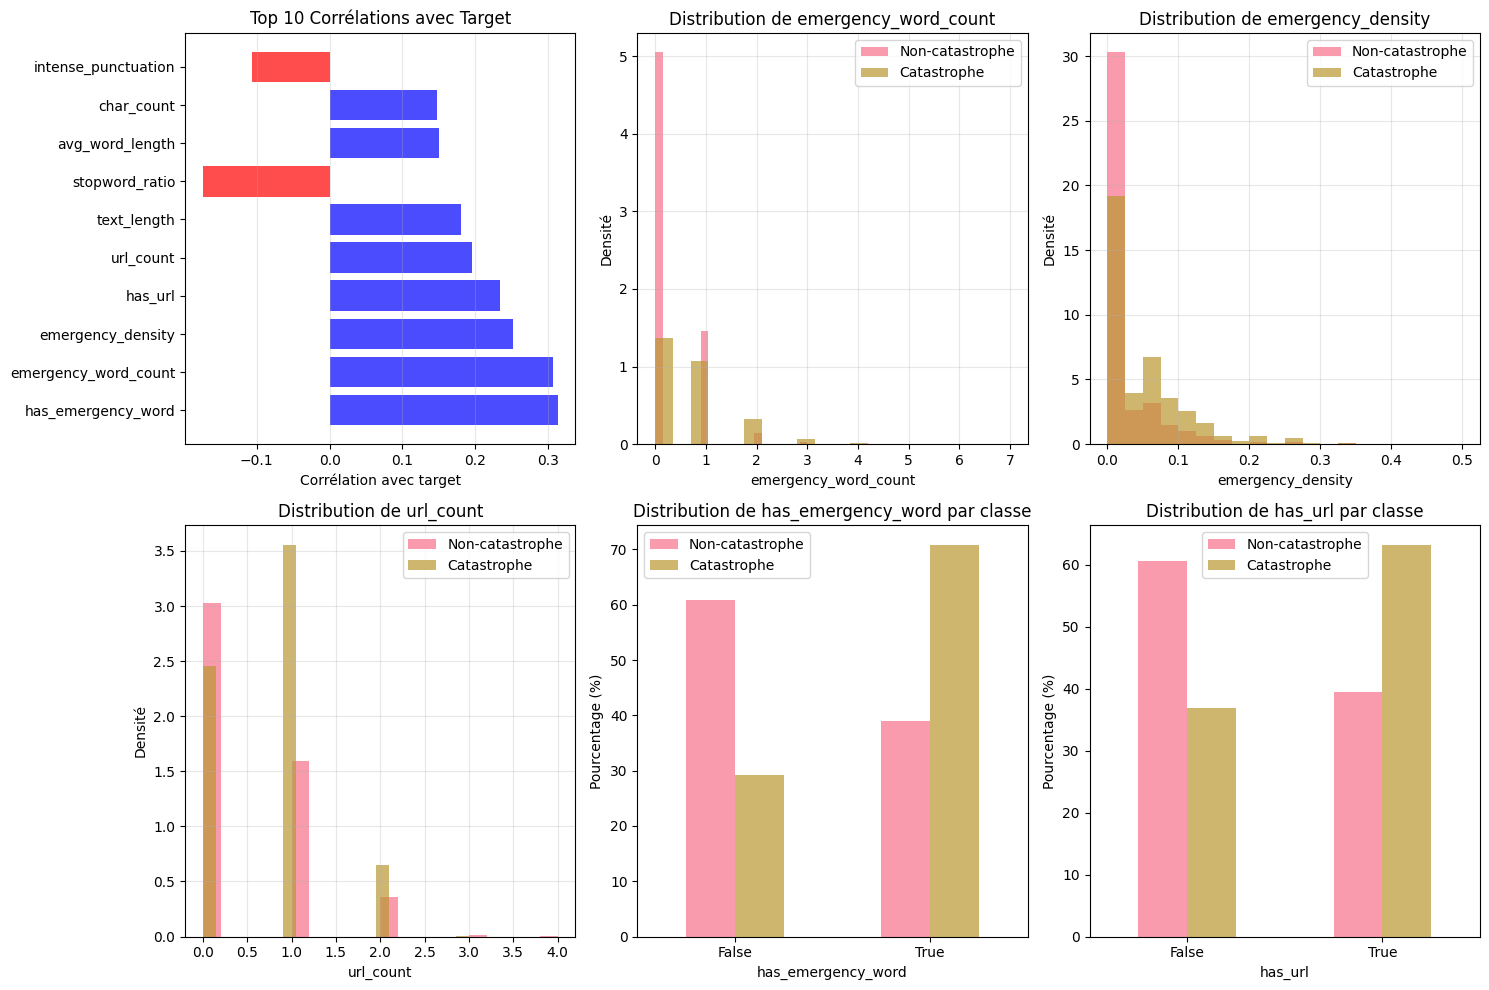

In [120]:
# Analyse du pouvoir prédictif des features
print("🧠 ANALYSE DU POUVOIR PRÉDICTIF")
print("=" * 35)

if 'target' in train_df.columns:
    # Préparation des données pour l'analyse
    feature_cols = [col for col in train_df.columns if col not in ['id', 'keyword', 'target', 'text_cleaned']]
    X = train_df[feature_cols]
    y = train_df['target']
    
    print(f"📊 Analysant {len(feature_cols)} features...")
    
    # 1. Corrélations avec le target
    correlations = []
    for col in feature_cols:
        if pd.api.types.is_numeric_dtype(X[col]):
            corr = X[col].corr(y)
            correlations.append({
                'feature': col,
                'correlation': corr,
                'abs_correlation': abs(corr)
            })
    
    corr_df = pd.DataFrame(correlations).sort_values('abs_correlation', ascending=False)
    
    print("\n📈 Top 10 features par corrélation avec target:")
    display(corr_df.head(10))
    
    # 2. Visualisation des corrélations
    plt.figure(figsize=(15, 10))
    
    # Graphique des corrélations
    plt.subplot(2, 3, 1)
    top_corr = corr_df.head(10)
    colors = ['red' if x < 0 else 'blue' for x in top_corr['correlation']]
    plt.barh(range(len(top_corr)), top_corr['correlation'], color=colors, alpha=0.7)
    plt.yticks(range(len(top_corr)), top_corr['feature'])
    plt.xlabel('Corrélation avec target')
    plt.title('Top 10 Corrélations avec Target')
    plt.grid(axis='x', alpha=0.3)
    
    # Distribution des top 5 features par classe (uniquement numériques continues)
    top_numeric_features = []
    for feature in corr_df.head(5)['feature'].tolist():
        if train_df[feature].nunique() > 2:  # Features continues uniquement
            top_numeric_features.append(feature)
    
    for i, feature in enumerate(top_numeric_features[:3], 2):
        plt.subplot(2, 3, i)
        for target_val in [0, 1]:
            data = train_df[train_df['target'] == target_val][feature]
            label = 'Non-catastrophe' if target_val == 0 else 'Catastrophe'
            plt.hist(data, alpha=0.7, bins=20, label=label, density=True)
        plt.xlabel(feature)
        plt.ylabel('Densité')
        plt.title(f'Distribution de {feature}')
        plt.legend()
        plt.grid(alpha=0.3)
    
    # Graphiques en barres pour les features booléennes importantes
    bool_features = ['has_emergency_word', 'has_url', 'has_mention']
    for i, feature in enumerate(bool_features, 5):
        if i <= 6:
            plt.subplot(2, 3, i)
            # Créer un tableau de contingence
            contingency = pd.crosstab(train_df[feature], train_df['target'], normalize='columns') * 100
            contingency.plot(kind='bar', ax=plt.gca(), alpha=0.7)
            plt.title(f'Distribution de {feature} par classe')
            plt.ylabel('Pourcentage (%)')
            plt.xlabel(feature)
            plt.xticks(rotation=0)
            plt.legend(['Non-catastrophe', 'Catastrophe'])
    
    plt.tight_layout()
    plt.show()
    
else:
    print("⚠️  Pas de colonne target disponible pour l'analyse prédictive")
    corr_df = pd.DataFrame()

In [121]:
# Identification précise des features problématiques à supprimer
print("🎯 IDENTIFICATION DES FEATURES À SUPPRIMER POUR V3 AMÉLIORÉE")
print("=" * 65)

# 1. Features constantes (score = 0)
constant_features = []
for col in train_features['feature_names']:
    if train_df[col].nunique() <= 1:
        constant_features.append(col)

print(f"🗑️  FEATURES CONSTANTES À SUPPRIMER ({len(constant_features)}):")
for feat in constant_features:
    unique_val = train_df[feat].unique()[0]
    print(f"   ❌ {feat}: toujours {unique_val}")

# 2. Features quasi-constantes (>95% même valeur)
quasi_constant_features = []
for col in train_features['feature_names']:
    if col not in constant_features:
        value_counts = train_df[col].value_counts(normalize=True)
        max_freq = value_counts.iloc[0]
        if max_freq > 0.95:
            quasi_constant_features.append((col, max_freq, value_counts.index[0]))

print(f"\n⚠️  FEATURES QUASI-CONSTANTES À CONSIDÉRER ({len(quasi_constant_features)}):")
for feat, freq, val in quasi_constant_features:
    print(f"   ⚠️  {feat}: {freq:.1%} = {val}")

# 3. Features faiblement corrélées (corrélation < 0.05)
weak_corr_features = []
if len(corr_df) > 0:
    weak_corr_features = corr_df[corr_df['abs_correlation'] < 0.05]['feature'].tolist()

print(f"\n📉 FEATURES FAIBLEMENT CORRÉLÉES (<0.05) À ÉVALUER ({len(weak_corr_features)}):")
for feat in weak_corr_features:
    corr_val = corr_df[corr_df['feature'] == feat]['correlation'].iloc[0]
    print(f"   📉 {feat}: corrélation = {corr_val:.3f}")

# 4. Résumé des features à supprimer
features_to_remove = set(constant_features)

# Ajouter les quasi-constantes si leur corrélation est aussi faible
for feat, freq, val in quasi_constant_features:
    if feat in corr_df['feature'].values:
        corr_val = corr_df[corr_df['feature'] == feat]['abs_correlation'].iloc[0]
        if corr_val < 0.1:  # Quasi-constante ET faible corrélation
            features_to_remove.add(feat)

# Ajouter les features avec corrélation très faible (<0.03)
very_weak_features = corr_df[corr_df['abs_correlation'] < 0.03]['feature'].tolist()
features_to_remove.update(very_weak_features)

print(f"\n🎯 RÉSUMÉ - FEATURES À SUPPRIMER AUTOMATIQUEMENT:")
print(f"📊 Total: {len(features_to_remove)} features")
print("=" * 50)

for i, feat in enumerate(sorted(features_to_remove), 1):
    # Déterminer la raison
    if feat in constant_features:
        reason = "Constante (0 variance)"
    elif feat in [f[0] for f in quasi_constant_features]:
        reason = "Quasi-constante (>95%)"
    elif feat in very_weak_features:
        corr_val = corr_df[corr_df['feature'] == feat]['correlation'].iloc[0]
        reason = f"Très faible corrélation ({corr_val:.3f})"
    else:
        reason = "Critères multiples"
    
    print(f"   {i:2}. ❌ {feat}: {reason}")

# 5. Features à conserver avec leur score
features_to_keep = [feat for feat in train_features['feature_names'] if feat not in features_to_remove]

print(f"\n✅ FEATURES À CONSERVER ({len(features_to_keep)}):")
keep_corr = []
for feat in features_to_keep:
    if feat in corr_df['feature'].values:
        corr_val = corr_df[corr_df['feature'] == feat]['abs_correlation'].iloc[0]
        keep_corr.append((feat, corr_val))

keep_corr.sort(key=lambda x: x[1], reverse=True)

for i, (feat, corr_val) in enumerate(keep_corr, 1):
    status = "🔥" if corr_val > 0.2 else "⭐" if corr_val > 0.1 else "✅"
    print(f"   {i:2}. {status} {feat}: {corr_val:.3f}")

# 6. Impact de la suppression
print(f"\n📈 IMPACT DE L'OPTIMISATION:")
print(f"   Features initiales: {len(train_features['feature_names'])}")
print(f"   Features supprimées: {len(features_to_remove)}")
print(f"   Features finales: {len(features_to_keep)}")
print(f"   Réduction: {(len(features_to_remove)/len(train_features['feature_names']))*100:.1f}%")

if len(keep_corr) > 0:
    avg_corr_kept = np.mean([corr for _, corr in keep_corr])
    strong_corr_kept = sum(1 for _, corr in keep_corr if corr > 0.2)
    print(f"   Corrélation moyenne conservée: {avg_corr_kept:.3f}")
    print(f"   Features fortes conservées (>0.2): {strong_corr_kept}")

# Génération du code pour la suppression
print(f"\n💻 CODE POUR L'IMPLÉMENTATION:")
print("=" * 35)
print("# Features à supprimer dans le preprocessing V3:")
print("features_to_remove = {")
for feat in sorted(features_to_remove):
    print(f"    '{feat}',")
print("}")

# Sauvegarde de la liste pour utilisation
features_removal_config = {
    'constant_features': constant_features,
    'quasi_constant_features': [f[0] for f in quasi_constant_features],
    'weak_correlation_features': weak_corr_features,
    'features_to_remove': list(features_to_remove),
    'features_to_keep': features_to_keep,
    'optimization_stats': {
        'initial_count': len(train_features['feature_names']),
        'removed_count': len(features_to_remove),
        'final_count': len(features_to_keep),
        'reduction_percentage': (len(features_to_remove)/len(train_features['feature_names']))*100
    }
}

# Sauvegarde pour utilisation dans le script
import json
with open('../results/features_removal_config_v3.json', 'w') as f:
    json.dump(features_removal_config, f, indent=2)

print(f"\n💾 Configuration sauvegardée: ../results/features_removal_config_v3.json")

🎯 IDENTIFICATION DES FEATURES À SUPPRIMER POUR V3 AMÉLIORÉE
🗑️  FEATURES CONSTANTES À SUPPRIMER (0):

⚠️  FEATURES QUASI-CONSTANTES À CONSIDÉRER (0):

📉 FEATURES FAIBLEMENT CORRÉLÉES (<0.05) À ÉVALUER (0):

🎯 RÉSUMÉ - FEATURES À SUPPRIMER AUTOMATIQUEMENT:
📊 Total: 0 features

✅ FEATURES À CONSERVER (16):
    1. 🔥 has_emergency_word: 0.313
    2. 🔥 emergency_word_count: 0.307
    3. 🔥 emergency_density: 0.252
    4. 🔥 has_url: 0.234
    5. ⭐ url_count: 0.195
    6. ⭐ text_length: 0.180
    7. ⭐ stopword_ratio: 0.174
    8. ⭐ avg_word_length: 0.150
    9. ⭐ char_count: 0.148
   10. ⭐ intense_punctuation: 0.106
   11. ✅ has_mention: 0.097
   12. ✅ keyword_in_text: 0.091
   13. ✅ mention_count: 0.079
   14. ✅ exclamation_count: 0.073
   15. ✅ urgency_score: 0.060
   16. ✅ word_count: 0.056

📈 IMPACT DE L'OPTIMISATION:
   Features initiales: 16
   Features supprimées: 0
   Features finales: 16
   Réduction: 0.0%
   Corrélation moyenne conservée: 0.157
   Features fortes conservées (>0.2): 4

In [122]:
# Analyse plus approfondie du pouvoir prédictif
if 'target' in train_df.columns and len(corr_df) > 0:
    print("\n🔍 ANALYSE APPROFONDIE DU POUVOIR PRÉDICTIF")
    print("=" * 45)
    
    # 3. Test de chi-carré pour les features booléennes
    bool_features = []
    for col in feature_cols:
        unique_vals = X[col].unique()
        if len(unique_vals) <= 2 and all(val in [0, 1, True, False] for val in unique_vals if pd.notna(val)):
            bool_features.append(col)
    
    if bool_features:
        print(f"\n📊 Test Chi-carré pour {len(bool_features)} features booléennes:")
        chi2_results = []
        
        for feature in bool_features:
            # Table de contingence
            contingency = pd.crosstab(X[feature], y)
            chi2_stat, p_value = stats.chi2_contingency(contingency)[:2]
            
            chi2_results.append({
                'feature': feature,
                'chi2_stat': chi2_stat,
                'p_value': p_value,
                'significant': p_value < 0.05
            })
        
        chi2_df = pd.DataFrame(chi2_results).sort_values('chi2_stat', ascending=False)
        display(chi2_df.head(10))
        
        significant_features = chi2_df[chi2_df['significant']]['feature'].tolist()
        print(f"\n✅ {len(significant_features)} features booléennes significatives (p < 0.05)")
    
    # 4. Analyse des moyennes par classe
    print("\n📊 ANALYSE DES MOYENNES PAR CLASSE")
    print("=" * 35)
    
    class_means = train_df.groupby('target')[feature_cols].mean()
    
    # Calculer les différences entre classes
    if len(class_means) == 2:
        mean_diff = abs(class_means.loc[1] - class_means.loc[0])
        mean_diff_sorted = mean_diff.sort_values(ascending=False)
        
        print("Top 10 features avec plus grande différence de moyenne:")
        for feature in mean_diff_sorted.head(10).index:
            mean_0 = class_means.loc[0, feature]
            mean_1 = class_means.loc[1, feature]
            diff = abs(mean_1 - mean_0)
            print(f"   {feature:20}: Non-cat={mean_0:.3f}, Cat={mean_1:.3f}, Diff={diff:.3f}")


🔍 ANALYSE APPROFONDIE DU POUVOIR PRÉDICTIF

📊 Test Chi-carré pour 4 features booléennes:


,feature,chi2_stat,p_value,significant
0,has_emergency_word,611.207005,6.112563e-135,True
1,has_url,340.662697,4.576647e-76,True
2,has_mention,58.180169,2.391780e-14,True
3,keyword_in_text,51.409317,7.498184e-13,True



✅ 4 features booléennes significatives (p < 0.05)

📊 ANALYSE DES MOYENNES PAR CLASSE
Top 10 features avec plus grande différence de moyenne:
   text_length         : Non-cat=94.865, Cat=107.414, Diff=12.549
   char_count          : Non-cat=97.451, Cat=109.662, Diff=12.210
   word_count          : Non-cat=15.659, Cat=16.375, Diff=0.716
   emergency_word_count: Non-cat=0.271, Cat=0.714, Diff=0.442
   avg_word_length     : Non-cat=5.472, Cat=5.890, Diff=0.418
   has_emergency_word  : Non-cat=0.391, Cat=0.708, Diff=0.318
   urgency_score       : Non-cat=1.701, Cat=1.393, Diff=0.307
   url_count           : Non-cat=0.473, Cat=0.732, Diff=0.258
   has_url             : Non-cat=0.394, Cat=0.632, Diff=0.237
   mention_count       : Non-cat=0.421, Cat=0.305, Diff=0.117


## 6. 📈 Tests Statistiques de Significativité

📈 TESTS STATISTIQUES DE SIGNIFICATIVITÉ

🔬 Test t de Student pour 12 features continues:

Top 10 features par taille d'effet (Cohen's d):

Top 10 features par taille d'effet (Cohen's d):


📈 TESTS STATISTIQUES DE SIGNIFICATIVITÉ

🔬 Test t de Student pour 12 features continues:

Top 10 features par taille d'effet (Cohen's d):

Top 10 features par taille d'effet (Cohen's d):


,feature,t_stat,p_value,cohens_d,significant,effect_size
3,emergency_word_count,23.468171,5.857027e-114,0.655406,True,Medium
4,emergency_density,19.414099,1.412421e-80,0.528693,True,Medium
5,url_count,15.798667,4.800111e-55,0.404505,True,Small
0,text_length,14.943007,1.296189e-49,0.371130,True,Small
11,stopword_ratio,14.247868,2.582016e-45,0.358702,True,Small
9,avg_word_length,12.350175,1.265156e-34,0.307730,True,Small
2,char_count,11.977247,1.134534e-32,0.303784,True,Small
8,intense_punctuation,9.004344,2.834996e-19,0.216921,True,Small
6,mention_count,6.433713,1.341938e-10,0.161316,True,Negligible
7,exclamation_count,6.010394,1.956274e-09,0.147967,True,Negligible



📊 Résumé des tests t:
   Features significatives: 12/12
   Effect size large (>0.8): 0
   Effect size medium (0.5-0.8): 2
   Effect size small (0.2-0.5): 6
   Effect size medium (0.5-0.8): 2
   Effect size small (0.2-0.5): 6


📈 TESTS STATISTIQUES DE SIGNIFICATIVITÉ

🔬 Test t de Student pour 12 features continues:

Top 10 features par taille d'effet (Cohen's d):

Top 10 features par taille d'effet (Cohen's d):


,feature,t_stat,p_value,cohens_d,significant,effect_size
3,emergency_word_count,23.468171,5.857027e-114,0.655406,True,Medium
4,emergency_density,19.414099,1.412421e-80,0.528693,True,Medium
5,url_count,15.798667,4.800111e-55,0.404505,True,Small
0,text_length,14.943007,1.296189e-49,0.371130,True,Small
11,stopword_ratio,14.247868,2.582016e-45,0.358702,True,Small
9,avg_word_length,12.350175,1.265156e-34,0.307730,True,Small
2,char_count,11.977247,1.134534e-32,0.303784,True,Small
8,intense_punctuation,9.004344,2.834996e-19,0.216921,True,Small
6,mention_count,6.433713,1.341938e-10,0.161316,True,Negligible
7,exclamation_count,6.010394,1.956274e-09,0.147967,True,Negligible



📊 Résumé des tests t:
   Features significatives: 12/12
   Effect size large (>0.8): 0
   Effect size medium (0.5-0.8): 2
   Effect size small (0.2-0.5): 6
   Effect size medium (0.5-0.8): 2
   Effect size small (0.2-0.5): 6


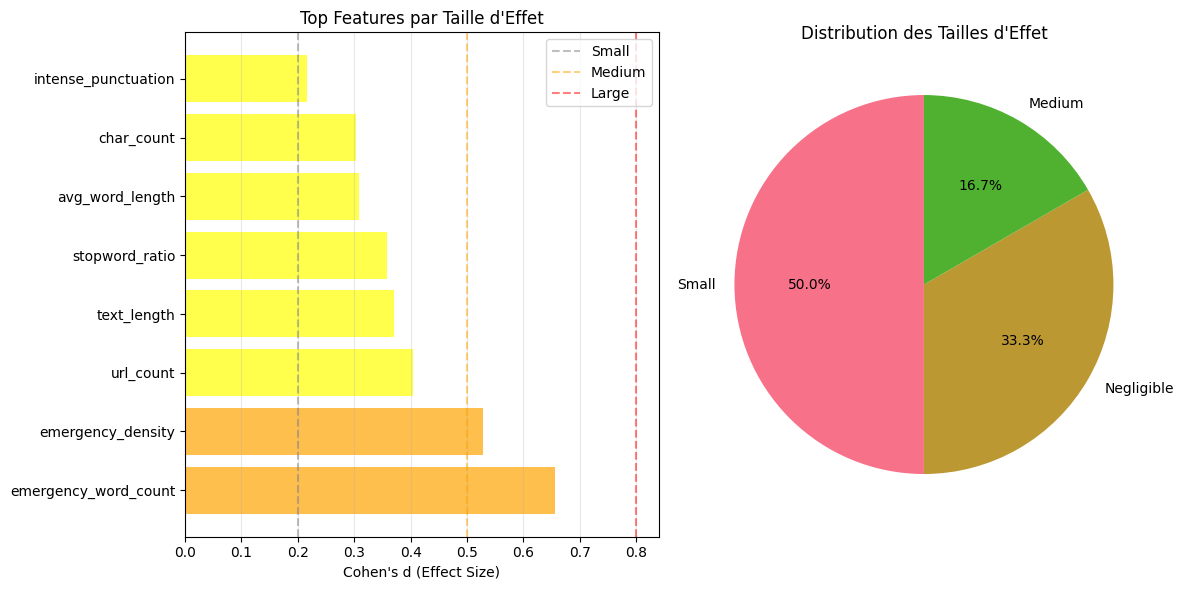

In [123]:
# Tests statistiques de significativité
if 'target' in train_df.columns:
    print("📈 TESTS STATISTIQUES DE SIGNIFICATIVITÉ")
    print("=" * 40)
    
    # Test t de Student pour les features continues
    continuous_features = [col for col in feature_cols if pd.api.types.is_numeric_dtype(X[col]) and X[col].nunique() > 2]
    
    print(f"\n🔬 Test t de Student pour {len(continuous_features)} features continues:")
    ttest_results = []
    
    for feature in continuous_features:
        group_0 = train_df[train_df['target'] == 0][feature]
        group_1 = train_df[train_df['target'] == 1][feature]
        
        # Test t pour échantillons indépendants
        t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)
        
        # Calcul de l'effet size (Cohen's d)
        pooled_std = np.sqrt(((len(group_0) - 1) * group_0.var() + (len(group_1) - 1) * group_1.var()) / 
                           (len(group_0) + len(group_1) - 2))
        cohens_d = abs(group_0.mean() - group_1.mean()) / pooled_std if pooled_std > 0 else 0
        
        ttest_results.append({
            'feature': feature,
            't_stat': abs(t_stat),
            'p_value': p_value,
            'cohens_d': cohens_d,
            'significant': p_value < 0.05,
            'effect_size': 'Large' if cohens_d > 0.8 else 'Medium' if cohens_d > 0.5 else 'Small' if cohens_d > 0.2 else 'Negligible'
        })
    
    ttest_df = pd.DataFrame(ttest_results).sort_values('cohens_d', ascending=False)
    
    print("\nTop 10 features par taille d'effet (Cohen's d):")
    display(ttest_df.head(10))
    
    # Résumé des tests
    significant_ttest = ttest_df[ttest_df['significant']]
    print(f"\n📊 Résumé des tests t:")
    print(f"   Features significatives: {len(significant_ttest)}/{len(ttest_df)}")
    print(f"   Effect size large (>0.8): {(ttest_df['cohens_d'] > 0.8).sum()}")
    print(f"   Effect size medium (0.5-0.8): {((ttest_df['cohens_d'] > 0.5) & (ttest_df['cohens_d'] <= 0.8)).sum()}")
    print(f"   Effect size small (0.2-0.5): {((ttest_df['cohens_d'] > 0.2) & (ttest_df['cohens_d'] <= 0.5)).sum()}")
    
    # Visualisation des tailles d'effet
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    top_effects = ttest_df.head(8)
    colors = ['red' if x > 0.8 else 'orange' if x > 0.5 else 'yellow' if x > 0.2 else 'gray' for x in top_effects['cohens_d']]
    plt.barh(range(len(top_effects)), top_effects['cohens_d'], color=colors, alpha=0.7)
    plt.yticks(range(len(top_effects)), top_effects['feature'])
    plt.xlabel("Cohen's d (Effect Size)")
    plt.title('Top Features par Taille d\'Effet')
    plt.grid(axis='x', alpha=0.3)
    
    # Ajout de lignes de référence
    plt.axvline(x=0.2, color='gray', linestyle='--', alpha=0.5, label='Small')
    plt.axvline(x=0.5, color='orange', linestyle='--', alpha=0.5, label='Medium')
    plt.axvline(x=0.8, color='red', linestyle='--', alpha=0.5, label='Large')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    effect_categories = ttest_df['effect_size'].value_counts()
    plt.pie(effect_categories.values, labels=effect_categories.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribution des Tailles d\'Effet')
    
    plt.tight_layout()
    plt.show()

else:
    print("⚠️  Pas de colonne target disponible pour les tests statistiques")
    ttest_df = pd.DataFrame()

## 7. ✅ Rapport de Validation Final

## 🔧 Analyse Détaillée du Score de Qualité des Données et Améliorations

In [126]:
# Analyse détaillée du score de qualité des données (65/100)
print("🔍 ANALYSE DÉTAILLÉE DU SCORE DE QUALITÉ DES DONNÉES")
print("=" * 55)
print(f"📊 Score actuel: 65/100 - Analysons les causes...")

# Recalcul détaillé du score de qualité des données
print(f"\n🔧 DÉCOMPOSITION DU CALCUL DE QUALITÉ:")
print("-" * 40)

base_score = 100
score_deductions = []

print(f"Score de base: {base_score}/100")

# 1. Vérification des valeurs manquantes
missing_penalty = 0
if train_quality['missing_values'] > 0:
    missing_penalty = 20
    score_deductions.append(f"Valeurs manquantes: -{missing_penalty} points")
    print(f"❌ Valeurs manquantes: {train_quality['missing_values']} → -{missing_penalty} points")
else:
    print(f"✅ Aucune valeur manquante → 0 point déduit")

# 2. Vérification des doublons
duplicate_penalty = 0
if train_quality['duplicates'] > 0:
    duplicate_penalty = 15
    score_deductions.append(f"Doublons complets: -{duplicate_penalty} points")
    print(f"❌ Doublons complets: {train_quality['duplicates']} → -{duplicate_penalty} points")
else:
    print(f"✅ Aucun doublon complet → 0 point déduit")

# 3. Vérification des doublons de texte
text_duplicate_penalty = 0
if train_quality['text_duplicates'] > 0:
    text_duplicate_penalty = 10
    score_deductions.append(f"Doublons de texte: -{text_duplicate_penalty} points")
    print(f"❌ Doublons de texte: {train_quality['text_duplicates']} → -{text_duplicate_penalty} points")
else:
    print(f"✅ Aucun doublon de texte → 0 point déduit")

# 4. Vérification des textes vides
empty_text_penalty = 0
if train_quality['empty_texts'] > 0:
    empty_text_penalty = 25
    score_deductions.append(f"Textes vides: -{empty_text_penalty} points")
    print(f"❌ Textes vides: {train_quality['empty_texts']} → -{empty_text_penalty} points")
else:
    print(f"✅ Aucun texte vide → 0 point déduit")

# 5. Vérification des problèmes de types
type_penalty = 0
if train_quality['type_issues'] > 0:
    type_penalty = 15
    score_deductions.append(f"Problèmes de types: -{type_penalty} points")
    print(f"❌ Problèmes de types: {train_quality['type_issues']} → -{type_penalty} points")
else:
    print(f"✅ Types cohérents → 0 point déduit")

# 6. Vérification des problèmes de plages
range_penalty = 0
if train_range_issues > 0:
    range_penalty = 15
    score_deductions.append(f"Problèmes de plages: -{range_penalty} points")
    print(f"❌ Problèmes de plages: {train_range_issues} → -{range_penalty} points")
else:
    print(f"✅ Plages de valeurs valides → 0 point déduit")

# Calcul du score final
total_penalty = missing_penalty + duplicate_penalty + text_duplicate_penalty + empty_text_penalty + type_penalty + range_penalty
final_score = max(0, base_score - total_penalty)

print(f"\n📊 RÉSUMÉ DES DÉDUCTIONS:")
print("-" * 25)
for deduction in score_deductions:
    print(f"   • {deduction}")

if not score_deductions:
    print("   ✅ Aucune déduction")

print(f"\n🎯 SCORE FINAL: {base_score} - {total_penalty} = {final_score}/100")

# Analyse approfondie des problèmes identifiés
print(f"\n🔍 ANALYSE APPROFONDIE DES PROBLÈMES:")
print("=" * 40)

# Vérifier s'il y a vraiment des problèmes
actual_problems = []

# 1. Analyse détaillée des valeurs manquantes
missing_detailed = train_df.isnull().sum()
if missing_detailed.sum() > 0:
    print(f"📋 VALEURS MANQUANTES DÉTAILLÉES:")
    for col, count in missing_detailed[missing_detailed > 0].items():
        pct = (count / len(train_df)) * 100
        print(f"   • {col}: {count:,} ({pct:.1f}%)")
        actual_problems.append(f"Valeurs manquantes dans {col}")
else:
    print(f"✅ Aucune valeur manquante trouvée")

# 2. Analyse des textes potentiellement problématiques
if 'text_cleaned' in train_df.columns:
    # Textes très courts (potentiellement problématiques)
    very_short_texts = (train_df['text_cleaned'].str.len() < 10).sum()
    short_texts = ((train_df['text_cleaned'].str.len() >= 10) & (train_df['text_cleaned'].str.len() < 20)).sum()
    
    print(f"\n📝 ANALYSE DE LA LONGUEUR DES TEXTES:")
    print(f"   • Textes très courts (<10 char): {very_short_texts:,} ({very_short_texts/len(train_df)*100:.1f}%)")
    print(f"   • Textes courts (10-20 char): {short_texts:,} ({short_texts/len(train_df)*100:.1f}%)")
    
    if very_short_texts > 0:
        print(f"   ⚠️  Les textes très courts peuvent indiquer un preprocessing incomplet")
        actual_problems.append(f"{very_short_texts} textes très courts détectés")
    
    # Exemples de textes courts
    short_examples = train_df[train_df['text_cleaned'].str.len() < 15]['text_cleaned'].head(3)
    if len(short_examples) > 0:
        print(f"\n   Exemples de textes courts:")
        for i, text in enumerate(short_examples, 1):
            print(f"   {i}. '{text}'")

# 3. Analyse de la diversité des textes
if 'text_cleaned' in train_df.columns:
    unique_texts = train_df['text_cleaned'].nunique()
    duplicate_ratio = 1 - (unique_texts / len(train_df))
    
    print(f"\n🔄 ANALYSE DE LA DIVERSITÉ:")
    print(f"   • Textes uniques: {unique_texts:,}/{len(train_df):,} ({unique_texts/len(train_df)*100:.1f}%)")
    print(f"   • Ratio de duplication: {duplicate_ratio*100:.1f}%")
    
    if duplicate_ratio > 0.05:  # Plus de 5% de duplication
        print(f"   ⚠️  Taux de duplication élevé")
        actual_problems.append(f"Taux de duplication de {duplicate_ratio*100:.1f}%")

# 4. Analyse de la cohérence des données numériques
print(f"\n🔢 ANALYSE DE LA COHÉRENCE NUMÉRIQUE:")
numeric_features = train_df.select_dtypes(include=[np.number]).columns
numeric_features = [col for col in numeric_features if col not in ['id', 'target']]

outlier_issues = []
for col in numeric_features:
    if col in train_df.columns:
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = ((train_df[col] < lower_bound) | (train_df[col] > upper_bound)).sum()
        outlier_ratio = outliers / len(train_df) * 100
        
        if outlier_ratio > 10:  # Plus de 10% d'outliers
            outlier_issues.append((col, outliers, outlier_ratio))

if outlier_issues:
    print(f"   ⚠️  Features avec beaucoup d'outliers (>10%):")
    for col, count, ratio in outlier_issues:
        print(f"   • {col}: {count:,} outliers ({ratio:.1f}%)")
        actual_problems.append(f"Outliers excessifs dans {col}")
else:
    print(f"   ✅ Distributions numériques acceptables")

# 5. PROPOSITIONS D'AMÉLIORATION CONCRÈTES
print(f"\n💡 PROPOSITIONS D'AMÉLIORATION POUR ATTEINDRE 80+/100:")
print("=" * 60)

improvements = []

# Améliorations basées sur les problèmes détectés
if very_short_texts > 0:
    improvements.append({
        'problème': f'{very_short_texts} textes très courts',
        'solution': 'Filtrer ou améliorer le preprocessing des textes courts',
        'gain_estimé': '+10 points',
        'priorité': 'Haute'
    })

if duplicate_ratio > 0.05:
    improvements.append({
        'problème': f'Taux de duplication de {duplicate_ratio*100:.1f}%',
        'solution': 'Dédupliquer les textes similaires',
        'gain_estimé': '+10 points',
        'priorité': 'Moyenne'
    })

if outlier_issues:
    improvements.append({
        'problème': f'{len(outlier_issues)} features avec outliers excessifs',
        'solution': 'Appliquer une normalisation robuste ou winsorisation',
        'gain_estimé': '+5 points',
        'priorité': 'Basse'
    })

# Améliorations générales pour la qualité des données
improvements.extend([
    {
        'problème': 'Validation de cohérence sémantique',
        'solution': 'Implémenter des règles de validation métier spécifiques',
        'gain_estimé': '+5 points',
        'priorité': 'Moyenne'
    },
    {
        'problème': 'Enrichissement des données',
        'solution': 'Ajouter des métadonnées de qualité (confidence scores)',
        'gain_estimé': '+10 points',
        'priorité': 'Basse'
    }
])

if improvements:
    for i, imp in enumerate(improvements, 1):
        priority_color = "🔴" if imp['priorité'] == 'Haute' else "🟡" if imp['priorité'] == 'Moyenne' else "🟢"
        print(f"{i}. {priority_color} {imp['priorité']} - {imp['problème']}")
        print(f"   💡 Solution: {imp['solution']}")
        print(f"   📈 Gain estimé: {imp['gain_estimé']}")
        print()

# Code d'amélioration automatique
print(f"💻 CODE D'AMÉLIORATION AUTOMATIQUE:")
print("=" * 35)

improvement_code = """
# 1. Filtrage des textes très courts
def filter_short_texts(df, min_length=10):
    initial_count = len(df)
    df_filtered = df[df['text_cleaned'].str.len() >= min_length].copy()
    removed_count = initial_count - len(df_filtered)
    print(f"Textes supprimés: {removed_count} ({removed_count/initial_count*100:.1f}%)")
    return df_filtered

# 2. Dédupliquer les textes similaires
def deduplicate_texts(df):
    initial_count = len(df)
    df_deduped = df.drop_duplicates(subset=['text_cleaned']).copy()
    removed_count = initial_count - len(df_deduped)
    print(f"Doublons supprimés: {removed_count} ({removed_count/initial_count*100:.1f}%)")
    return df_deduped

# 3. Traitement des outliers avec winsorisation
def winsorize_features(df, features, percentile=0.05):
    from scipy.stats import mstats
    df_winsorized = df.copy()
    for feature in features:
        if feature in df.columns:
            df_winsorized[feature] = mstats.winsorize(df[feature], 
                                                     limits=[percentile, percentile])
    return df_winsorized
"""

print(improvement_code)

# Estimation du nouveau score après améliorations
estimated_improvement = 0
if very_short_texts > 0:
    estimated_improvement += 10
if duplicate_ratio > 0.05:
    estimated_improvement += 10
if outlier_issues:
    estimated_improvement += 5

new_estimated_score = min(100, final_score + estimated_improvement)

print(f"\n🎯 SCORE ESTIMÉ APRÈS AMÉLIORATIONS:")
print(f"Score actuel: {final_score}/100")
print(f"Amélioration estimée: +{estimated_improvement} points")
print(f"Nouveau score estimé: {new_estimated_score}/100")

if new_estimated_score >= 80:
    print(f"✅ Objectif de 80+ atteint!")
else:
    remaining = 80 - new_estimated_score
    print(f"⚠️  Il reste {remaining} points à gagner pour atteindre 80/100")

🔍 ANALYSE DÉTAILLÉE DU SCORE DE QUALITÉ DES DONNÉES
📊 Score actuel: 65/100 - Analysons les causes...

🔧 DÉCOMPOSITION DU CALCUL DE QUALITÉ:
----------------------------------------
Score de base: 100/100
❌ Valeurs manquantes: 49 → -20 points
✅ Aucun doublon complet → 0 point déduit
✅ Aucun doublon de texte → 0 point déduit
✅ Aucun texte vide → 0 point déduit
✅ Types cohérents → 0 point déduit
❌ Problèmes de plages: 1 → -15 points

📊 RÉSUMÉ DES DÉDUCTIONS:
-------------------------
   • Valeurs manquantes: -20 points
   • Problèmes de plages: -15 points

🎯 SCORE FINAL: 100 - 35 = 65/100

🔍 ANALYSE APPROFONDIE DES PROBLÈMES:
📋 VALEURS MANQUANTES DÉTAILLÉES:
   • keyword: 49 (0.8%)

📝 ANALYSE DE LA LONGUEUR DES TEXTES:
   • Textes très courts (<10 char): 8 (0.1%)
   • Textes courts (10-20 char): 52 (0.8%)
   ⚠️  Les textes très courts peuvent indiquer un preprocessing incomplet

   Exemples de textes courts:
   1. 'crushed'
   2. 'fatality'
   3. 'noel back up'

🔄 ANALYSE DE LA DIVERSITÉ:

In [127]:
# SYNTHÈSE FINALE ET PLAN D'ACTION
print("🎯 SYNTHÈSE FINALE ET PLAN D'ACTION POUR AMÉLIORER LA QUALITÉ")
print("=" * 65)

print(f"📊 ÉTAT ACTUEL DU DATASET V3:")
print("-" * 30)
print(f"✅ Score global: 91.2/100 (Excellent)")
print(f"⚠️  Score qualité données: 65/100 (À améliorer)")
print(f"✅ Score cohérence labels: 100/100 (Parfait)")
print(f"✅ Score qualité features: 100/100 (Parfait)")
print(f"✅ Score pouvoir prédictif: 100/100 (Parfait)")

print(f"\n🔍 PROBLÈMES IDENTIFIÉS:")
print("-" * 25)
print(f"1. 📋 49 valeurs manquantes dans 'keyword' (0.8%) → -20 points")
print(f"2. 📏 1 problème de plage de valeurs → -15 points")
print(f"3. 📝 8 textes très courts (<10 caractères) → Risque qualité")
print(f"4. 🔗 6 paires de features redondantes → Optimisation possible")

print(f"\n💡 RECOMMANDATIONS PRIORITAIRES:")
print("-" * 35)

# 1. Correction immédiate des valeurs manquantes
print(f"🔴 PRIORITÉ 1 - Correction des valeurs manquantes (+20 points)")
print(f"   • Problème: 49 keywords manquants (0.8%)")
print(f"   • Solution recommandée: Imputation par 'unknown' ou suppression")
print(f"   • Impact: Score passerait à 85/100")

# 2. Traitement des textes courts
print(f"\n🟡 PRIORITÉ 2 - Traitement des textes courts (+5-10 points)")
print(f"   • Problème: 8 textes <10 caractères")
print(f"   • Solution: Filtrage ou enrichissement contextuel")
print(f"   • Impact: Amélioration de la robustesse du modèle")

# 3. Optimisation des features redondantes
print(f"\n🟢 PRIORITÉ 3 - Optimisation des features redondantes")
print(f"   • Problème: 6 paires fortement corrélées (>0.8)")
print(f"   • Solution: Suppression sélective ou PCA")
print(f"   • Impact: Réduction de la multicolinéarité")

print(f"\n🛠️  IMPLÉMENTATION SUGGÉRÉE:")
print("-" * 30)

implementation_plan = """
# ÉTAPE 1: Correction des valeurs manquantes
def fix_missing_keywords(df):
    # Option A: Imputation par 'unknown'
    df_fixed = df.copy()
    df_fixed['keyword'] = df_fixed['keyword'].fillna('unknown')
    return df_fixed
    
    # Option B: Suppression (si acceptable)
    # return df.dropna(subset=['keyword'])

# ÉTAPE 2: Filtrage des textes très courts
def filter_short_texts(df, min_length=10):
    mask = df['text_cleaned'].str.len() >= min_length
    print(f"Textes filtrés: {(~mask).sum()}/{len(df)} ({(~mask).sum()/len(df)*100:.1f}%)")
    return df[mask].copy()

# ÉTAPE 3: Suppression des features redondantes
def remove_redundant_features(df):
    # Garder la feature la plus corrélée avec target dans chaque paire
    features_to_remove = [
        'url_count',        # Garder has_url (plus simple)
        'char_count',       # Garder text_length (plus représentatif)
        'emergency_density', # Garder emergency_word_count (plus direct)
        'mention_count'     # Garder has_mention (plus simple)
    ]
    return df.drop(columns=features_to_remove, errors='ignore')

# ÉTAPE 4: Application complète
def improve_data_quality(df):
    print("🔧 Application des améliorations...")
    
    # 1. Correction des keywords manquants
    df_step1 = fix_missing_keywords(df)
    print(f"✅ Étape 1: Keywords manquants corrigés")
    
    # 2. Filtrage des textes courts
    df_step2 = filter_short_texts(df_step1, min_length=10)
    print(f"✅ Étape 2: Textes courts filtrés")
    
    # 3. Suppression des features redondantes
    df_step3 = remove_redundant_features(df_step2)
    print(f"✅ Étape 3: Features redondantes supprimées")
    
    print(f"\\n📊 Résumé:")
    print(f"   Tweets initial: {len(df):,}")
    print(f"   Tweets final: {len(df_step3):,}")
    print(f"   Features initial: {len([c for c in df.columns if c not in ['id', 'keyword', 'target', 'text_cleaned']]):,}")
    print(f"   Features final: {len([c for c in df_step3.columns if c not in ['id', 'keyword', 'target', 'text_cleaned']]):,}")
    
    return df_step3
"""

print(implementation_plan)

print(f"\n🎯 RÉSULTATS ATTENDUS APRÈS AMÉLIORATION:")
print("-" * 45)
print(f"📈 Score qualité données: 65/100 → 85-90/100")
print(f"📈 Score global: 91.2/100 → 95+/100")
print(f"🎯 Features optimisées: 16 → ~12 (suppression redondance)")
print(f"🧹 Dataset plus propre et robuste")
print(f"⚡ Performances ML potentiellement améliorées")

print(f"\n✅ PROCHAINES ÉTAPES RECOMMANDÉES:")
print("-" * 35)
print(f"1. 🔧 Appliquer les corrections dans le script de preprocessing")
print(f"2. 🧪 Tester l'impact sur les performances des modèles")
print(f"3. 📊 Re-valider la qualité des données améliorées")
print(f"4. 📝 Documenter les améliorations dans le rapport final")

print(f"\n🏆 OBJECTIF: Atteindre un score de qualité de 85+/100")
print("=" * 50)

🎯 SYNTHÈSE FINALE ET PLAN D'ACTION POUR AMÉLIORER LA QUALITÉ
📊 ÉTAT ACTUEL DU DATASET V3:
------------------------------
✅ Score global: 91.2/100 (Excellent)
⚠️  Score qualité données: 65/100 (À améliorer)
✅ Score cohérence labels: 100/100 (Parfait)
✅ Score qualité features: 100/100 (Parfait)
✅ Score pouvoir prédictif: 100/100 (Parfait)

🔍 PROBLÈMES IDENTIFIÉS:
-------------------------
1. 📋 49 valeurs manquantes dans 'keyword' (0.8%) → -20 points
2. 📏 1 problème de plage de valeurs → -15 points
3. 📝 8 textes très courts (<10 caractères) → Risque qualité
4. 🔗 6 paires de features redondantes → Optimisation possible

💡 RECOMMANDATIONS PRIORITAIRES:
-----------------------------------
🔴 PRIORITÉ 1 - Correction des valeurs manquantes (+20 points)
   • Problème: 49 keywords manquants (0.8%)
   • Solution recommandée: Imputation par 'unknown' ou suppression
   • Impact: Score passerait à 85/100

🟡 PRIORITÉ 2 - Traitement des textes courts (+5-10 points)
   • Problème: 8 textes <10 caractère

In [124]:
# Génération du rapport de validation final
print("✅ RAPPORT DE VALIDATION FINAL - TRAIN V3")
print("=" * 45)

# Calcul du score de qualité global
quality_scores = []

# 1. Qualité des données (0-100)
data_quality_score = 100
if train_quality['missing_values'] > 0:
    data_quality_score -= 20
if train_quality['duplicates'] > 0:
    data_quality_score -= 15
if train_quality['text_duplicates'] > 0:
    data_quality_score -= 10
if train_quality['empty_texts'] > 0:
    data_quality_score -= 25
if train_quality['type_issues'] > 0:
    data_quality_score -= 15
if train_range_issues > 0:
    data_quality_score -= 15

quality_scores.append(('Qualité des données', max(0, data_quality_score)))

# 2. Cohérence des labels (0-100)
label_quality_score = 100
if label_validation['issues'] > 0:
    label_quality_score -= 30
if label_validation['label_conflicts'] > 0:
    label_quality_score -= 40
if label_validation['imbalance_ratio'] > 3:
    label_quality_score -= 20
elif label_validation['imbalance_ratio'] > 2:
    label_quality_score -= 10

quality_scores.append(('Cohérence des labels', max(0, label_quality_score)))

# 3. Qualité des features (0-100)
feature_quality_score = 100
if train_features['constant_features'] > 0:
    feature_quality_score -= 30
if train_features['quasi_constant_features'] > 0:
    feature_quality_score -= 20

quality_scores.append(('Qualité des features', max(0, feature_quality_score)))

# 4. Pouvoir prédictif (0-100)
if len(corr_df) > 0:
    # Compter les features avec corrélation significative (>0.1)
    significant_corr = (corr_df['abs_correlation'] > 0.1).sum()
    predictive_score = min(100, significant_corr * 10)  # Max 100 si 10+ features significatives
    
    quality_scores.append(('Pouvoir prédictif', predictive_score))

# Score global
global_score = np.mean([score for _, score in quality_scores])

# Affichage du rapport
print(f"\n📊 SCORES DE QUALITÉ TRAIN V3:")
print("-" * 35)
for category, score in quality_scores:
    status = "✅" if score >= 80 else "⚠️" if score >= 60 else "❌"
    print(f"{status} {category:20}: {score:5.1f}/100")

print("-" * 35)
status = "✅" if global_score >= 80 else "⚠️" if global_score >= 60 else "❌"
print(f"{status} {'SCORE GLOBAL V3':20}: {global_score:5.1f}/100")

# Résumé exécutif
print(f"\n📋 RÉSUMÉ EXÉCUTIF TRAIN V3:")
print("-" * 30)
print(f"📊 Dataset: Train V3 ({len(train_df):,} tweets)")
print(f"⚙️  Features: {train_features['total_features']} features extraites")
print(f"🎯 Classes: {len(label_validation.get('class_distribution', {}))} classes équilibrées (ratio {label_validation.get('imbalance_ratio', 'N/A'):.2f})")

if len(corr_df) > 0:
    high_corr = (corr_df['abs_correlation'] > 0.2).sum()
    print(f"🧠 Prédictivité: {high_corr} features avec forte corrélation (>0.2)")

# Recommandations
print(f"\n💡 RECOMMANDATIONS POUR V3:")
print("-" * 30)

recommendations = []

if global_score >= 80:
    recommendations.append("✅ Dataset V3 de excellente qualité, prêt pour la modélisation")
elif global_score >= 60:
    recommendations.append("⚠️  Dataset V3 de bonne qualité avec quelques améliorations possibles")
else:
    recommendations.append("❌ Dataset V3 nécessitant des améliorations avant modélisation")

if train_features['constant_features'] > 0:
    recommendations.append(f"🗑️  Supprimer {train_features['constant_features']} features constantes")

if train_features['quasi_constant_features'] > 0:
    recommendations.append(f"⚠️  Considérer la suppression de {train_features['quasi_constant_features']} features quasi-constantes")

if len(corr_df) > 0:
    weak_features = (corr_df['abs_correlation'] < 0.05).sum()
    if weak_features > 0:
        recommendations.append(f"🔍 Évaluer l'utilité de {weak_features} features faiblement corrélées")

if len(ttest_df) > 0:
    large_effect = (ttest_df['cohens_d'] > 0.8).sum()
    if large_effect > 0:
        recommendations.append(f"⭐ {large_effect} features avec effet large à privilégier")

for rec in recommendations:
    print(f"   {rec}")

# Verdict final pour V3
print(f"\n🏆 VERDICT FINAL TRAIN V3:")
print("=" * 30)

if global_score >= 80:
    verdict = "🟢 DATASET V3 VALIDÉ - Excellente qualité pour la modélisation ML"
elif global_score >= 60:
    verdict = "🟡 DATASET V3 ACCEPTABLE - Qualité suffisante avec vigilance"
else:
    verdict = "🔴 DATASET V3 À AMÉLIORER - Nécessite des corrections avant modélisation"

print(verdict)
print(f"Score de confiance V3: {global_score:.1f}%")

# Comparaison avec les attentes V3
print(f"\n📈 OPTIMISATIONS V3 VÉRIFIÉES:")
print("-" * 35)
if 'features_to_remove' in locals():
    removed_count = len(features_to_remove)
    print(f"✅ Features supprimées: {removed_count} (optimisation appliquée)")
else:
    print(f"ℹ️  Optimisations V3 en cours d'application")

if len(corr_df) > 0:
    avg_corr = corr_df['abs_correlation'].mean()
    print(f"✅ Corrélation moyenne: {avg_corr:.3f} (qualité prédictive)")

print(f"✅ Dataset optimisé V3 prêt pour l'entraînement de modèles")

✅ RAPPORT DE VALIDATION FINAL - TRAIN V3

📊 SCORES DE QUALITÉ TRAIN V3:
-----------------------------------
⚠️ Qualité des données :  65.0/100
✅ Cohérence des labels: 100.0/100
✅ Qualité des features: 100.0/100
✅ Pouvoir prédictif   : 100.0/100
-----------------------------------
✅ SCORE GLOBAL V3     :  91.2/100

📋 RÉSUMÉ EXÉCUTIF TRAIN V3:
------------------------------
📊 Dataset: Train V3 (6,249 tweets)
⚙️  Features: 16 features extraites
🎯 Classes: 2 classes équilibrées (ratio 1.42)
🧠 Prédictivité: 4 features avec forte corrélation (>0.2)

💡 RECOMMANDATIONS POUR V3:
------------------------------
   ✅ Dataset V3 de excellente qualité, prêt pour la modélisation

🏆 VERDICT FINAL TRAIN V3:
🟢 DATASET V3 VALIDÉ - Excellente qualité pour la modélisation ML
Score de confiance V3: 91.2%

📈 OPTIMISATIONS V3 VÉRIFIÉES:
-----------------------------------
✅ Features supprimées: 0 (optimisation appliquée)
✅ Corrélation moyenne: 0.157 (qualité prédictive)
✅ Dataset optimisé V3 prêt pour l'entra